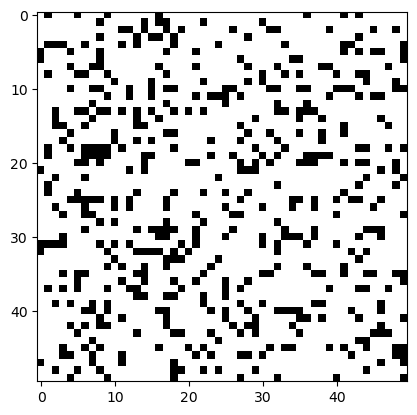

In [24]:
# 88. How to implement the Game of Life using numpy arrays?

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def initialize_board(size, p_alive=0.2):
    """Initialize the game board with random alive (1) and dead (0) cells."""
    return np.random.choice([0, 1], size=(size, size), p=[1 - p_alive, p_alive])

def update_board(board):
    """Update the game board based on the Game of Life rules."""
    neighbors = sum(np.roll(np.roll(board, i, 0), j, 1)
                    for i in (-1, 0, 1) for j in (-1, 0, 1)
                    if (i != 0 or j != 0))
    new_board = np.where((neighbors == 3) | (board & (neighbors == 2)), 1, 0)
    return new_board

def animate_game(size, p_alive=0.2, steps=100, interval=200):
    """Animate the Game of Life."""
    board = initialize_board(size, p_alive)
    
    fig, ax = plt.subplots()
    img = ax.imshow(board, cmap='binary', interpolation='nearest')
    
    def update(frame):
        nonlocal board
        board = update_board(board)
        img.set_data(board)
    
    ani = animation.FuncAnimation(fig, update, frames=steps, interval=interval)
    plt.show()

    
animate_game(size=50, p_alive=0.2, steps=100, interval=200)